In [1]:
library(MotifDb)
library(seqLogo)
library(motifStack)
library(Biostrings)
library(GenomicFeatures)
library(igraph)
library(stringr)


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: Biostrings

Loading required package: XVector


A

In [2]:
print(version)
 tools:::.BioC_version_associated_with_R_version()

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          2.3                         
year           2023                        
month          03                          
day            15                          
svn rev        83980                       
language       R                           
version.string R version 4.2.3 (2023-03-15)
nickname       Shortstop Beagle            


[1] ‘3.16’

In [3]:
MotifDb

MotifDb object of length 12657
| Created from downloaded public sources, last update: 2022-Mar-04
| 12657 position frequency matrices from 22 sources:
|         cisbp_1.02:  874
|    FlyFactorSurvey:  614
|        HOCOMOCOv10: 1066
| HOCOMOCOv11-core-A:  181
| HOCOMOCOv11-core-B:   84
| HOCOMOCOv11-core-C:  135
| HOCOMOCOv11-secondary-A:   46
| HOCOMOCOv11-secondary-B:   19
| HOCOMOCOv11-secondary-C:   13
| HOCOMOCOv11-secondary-D:  290
|              HOMER:  332
|               hPDI:  437
|        JASPAR_2014:  592
|        JASPAR_CORE:  459
|         jaspar2016: 1209
|         jaspar2018: 1564
|         jaspar2022: 1956
|          jolma2013:  843
|             ScerTF:  196
|            stamlab:  683
|       SwissRegulon:  684
|           UniPROBE:  380
| 62 organism/s
|           Hsapiens: 6075
|          Mmusculus: 1554
|      Dmelanogaster: 1437
|          Athaliana: 1371
|        Scerevisiae: 1221
|                 NA:  184
|              other:  815
Scerevisiae-cisbp_1.02-M0001_1

In [4]:
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(AnnotationDbi)
library(BSgenome.Mmusculus.UCSC.mm10)





Loading required package: BSgenome

Loading required package: rtracklayer


Attaching package: ‘rtracklayer’


The following object is masked from ‘package:igraph’:

    blocks




In [5]:
findHits <- function (TF.gene,pfm,per){
    
    pcm.nfix.jaspar = pfm


    
    seqLogo(pcm.nfix.jaspar)

    pwm.hits <- sapply(promoter.seqs, 
                          function(pseq) 
                             matchPWM(pcm.nfix.jaspar, unlist(pseq), min.score=per))

    nfix.jaspar.hits <- sapply(pwm.hits, length)
    head(nfix.jaspar.hits)
    nfix.jaspar.hits.positive <- nfix.jaspar.hits[nfix.jaspar.hits > 0]
    head(nfix.jaspar.hits.positive)
    length(nfix.jaspar.hits.positive)
    length(nfix.jaspar.hits)

    hit.genes =  as.data.frame( genes[ genes %in% names( nfix.jaspar.hits.positive)])
    hit.genes$gene = row.names(hit.genes)
    colnames(hit.genes) = c("ENTREZID","gene")

    nfix.jaspar.hits.dataframe = as.data.frame(nfix.jaspar.hits)
    nfix.jaspar.hits.dataframe$ENTREZID = row.names(nfix.jaspar.hits.dataframe)
    colnames(nfix.jaspar.hits.dataframe) = c("hits","ENTREZID")
    nfix.hits.genes <- merge(hit.genes,nfix.jaspar.hits.dataframe,by=c("ENTREZID"))

    nfix.hits.genes$TF <- TF.gene
    head(nfix.hits.genes)
    dim(nfix.hits.genes)
    return (nfix.hits.genes)

}

In [6]:
plotAllMotif<- function ( geneName  ) {

    #mat = query(MotifDb, geneName)
    print(geneName)
    pfm.TF = c()
    count = 0
    print(length (as.list (mat)))
    if(length (as.list (mat)) > 1 ){
        for (key in c(1: length (as.list (mat)) )) {
            count = count + 1
            pfm  <- new("pfm", mat=mat[[key]], 
                                name=paste( names(as.list (mat)[key]),"--",count ))

            pfm.TF = c(pfm.TF,pfm)
        }

        plotMotifLogoStack(DNAmotifAlignment( pfm.TF   ))
    }else{
        if(length (as.list (mat)) == 1 ){
            print(geneName)
            pfm <- mat[[1]]
            seqLogo(pfm)
        }
        
    }
    
}

<h1>Cluster 1 vs 2 DEG</h1>

<b>Identify promoters which support such expression patterns.
Promoter regions were defined as encompassing a 3 kb region (2.5 kb upstream and 0.5 kb downstream of the TSS), relative to 5′ TSSs of all transcripts annotated</b>

In [7]:
load( "data/ovaryE11-P5-cluste1_2.DEG_cut.Rdata")
dim(cluste1_2.DEG_CUT)
head(cluste1_2.DEG_CUT)

[1] 3014    8

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Mthfd2,1.318430e-18,-1.3001692,0.163,0.851,5.714867e-14,2,down,Mthfd2
Nfia,2.842903e-17,0.7486120,0.939,0.761,1.232285e-12,2,up,Nfia
Hmga1,4.069092e-17,-1.0699394,0.469,0.955,1.763789e-12,2,down,Hmga1
Lin28a,8.721956e-17,-1.4856301,0.082,0.687,3.780619e-12,2,down,Lin28a
Gm10123,2.140316e-16,-0.3154334,0.959,1.000,9.277412e-12,2,down,Gm10123
Umps,2.231054e-16,-0.9930111,0.480,0.985,9.670727e-12,2,down,Umps


<h1>Get promoter seq<h1>

In [8]:
cluste1_2.DEG <- cluste1_2.DEG_CUT
genesS <- cluste1_2.DEG$gene
head(genesS)
genes <- mapIds(org.Mm.eg.db, genesS, 'ENTREZID', 'SYMBOL')
genes <- genes[!is.na(genes)]
genes <- genes[genes %in% keys(TxDb.Mmusculus.UCSC.mm10.knownGene)]
head(genes)

grl <- transcriptsBy(TxDb.Mmusculus.UCSC.mm10.knownGene, by="gene") [genes]
promoter.seqs <- getPromoterSeq(grl, Mmusculus, upstream=2500,
                                downstream=500)
head(promoter.seqs)

[1] "Mthfd2"  "Nfia"    "Hmga1"   "Lin28a"  "Gm10123" "Umps"

'select()' returned 1:1 mapping between keys and columns



Mthfd2     Nfia    Hmga1   Lin28a     Umps   Trim71 
 "17768"  "18027"  "15361"  "83557"  "22247" "636931"

DNAStringSetList of length 6
[["17768"]] 17768=ACTGGCAACCCTAGGTTCAATCAGAAGTCTTGCCTCAATGAATAGAGGGAAGAGGGACA...
[["18027"]] 18027=ACATACACACACACACGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAG...
[["15361"]] 15361=ACCTCTTTTCAGTGTCCTGGTTTGGTTACCGAGTCAGATACACCCCATCCTTACATGGA...
[["83557"]] 83557=TGTCTTCCTTAGTATTCAAGAAATATTCAGAGCTAGAGAGATGGCTGAGTGGTTAAGAA...
[["22247"]] 22247=GTGGACAGGTTTCCCCATAGGGACCATTACACATATACATATAAGTACATACTTCCATC...
[["636931"]] 636931=ACTGCTTGTCTTAGTTAGGGTTTTACTGCTGTGAACAGATACCATGACCAAGGCAAC...

<h1>Transcription factors</h1>

In [9]:
allTF = values (MotifDb)$geneSymbol


In [10]:
cluste1_2.DEG.TF = cluste1_2.DEG[toupper(cluste1_2.DEG$gene) %in% toupper(allTF), ]
cluste1_2.DEG.TF = cluste1_2.DEG.TF[cluste1_2.DEG.TF$dir == "up", ]
cluste1_2.DEG.TF
dim(cluste1_2.DEG.TF)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Nfia,2.842903e-17,0.7486120,0.939,0.761,1.232285e-12,2,up,Nfia
Nfib,1.733598e-09,0.5787188,0.959,0.940,7.514455e-05,2,up,Nfib
Nr2f2,2.283100e-06,0.2815345,0.980,1.000,9.896324e-02,2,up,Nr2f2


[1] 3 8

[1] "NFIA"
[1] 2


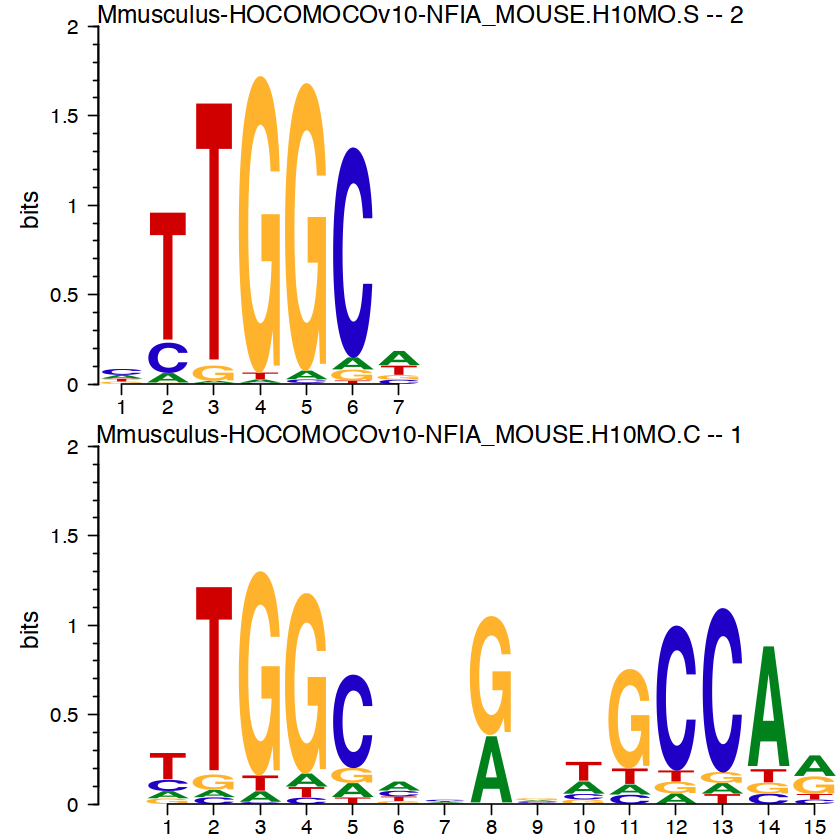

In [11]:
#NFIA
TF.gene = toupper(cluste1_2.DEG.TF$gene[1])
mat = subset (MotifDb,
                        organism=='Mmusculus' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)



Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM",

,ENTREZID,gene,hits,TF,source
,<chr>,<chr>,<int>,<chr>,<chr>
1,100088,Rcc1,1,NFIA,hocomocov10
2,100628619,Mir5114,1,NFIA,hocomocov10
3,101471,Phrf1,1,NFIA,hocomocov10
4,101490,Inpp5f,1,NFIA,hocomocov10
5,101565,Ccp110,1,NFIA,hocomocov10
6,102466836,Mir7578,1,NFIA,hocomocov10


[1] 463   5

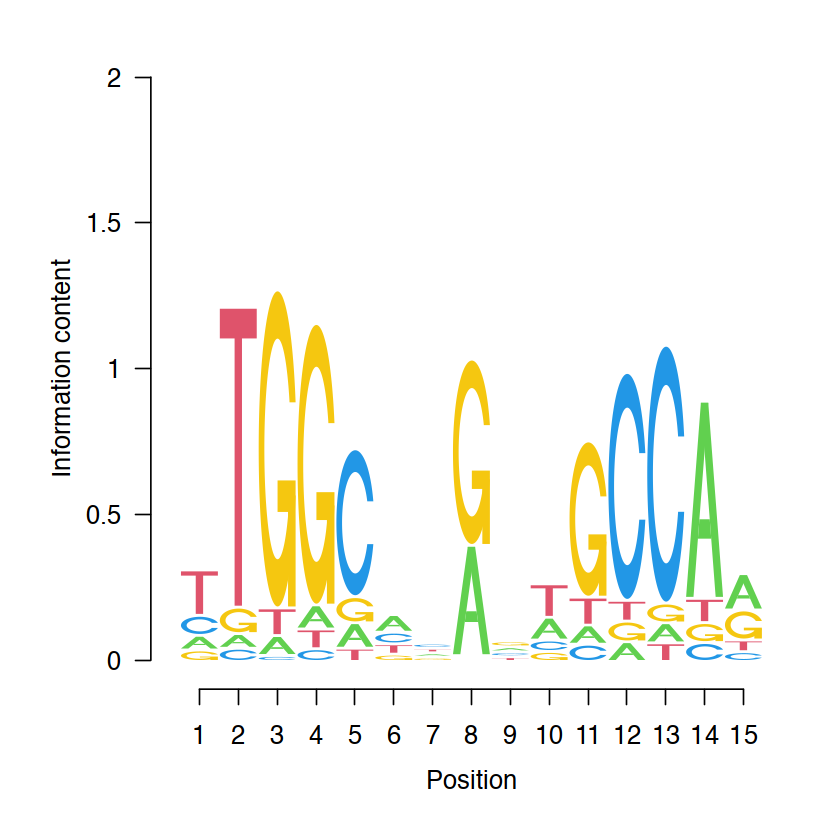

In [12]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "hocomocov10"
#### dataframe with TF hits 
TF.hits <- hits.tf
head(TF.hits)
dim(TF.hits)

[1] "NFIB"
[1] 1
[1] "NFIB"


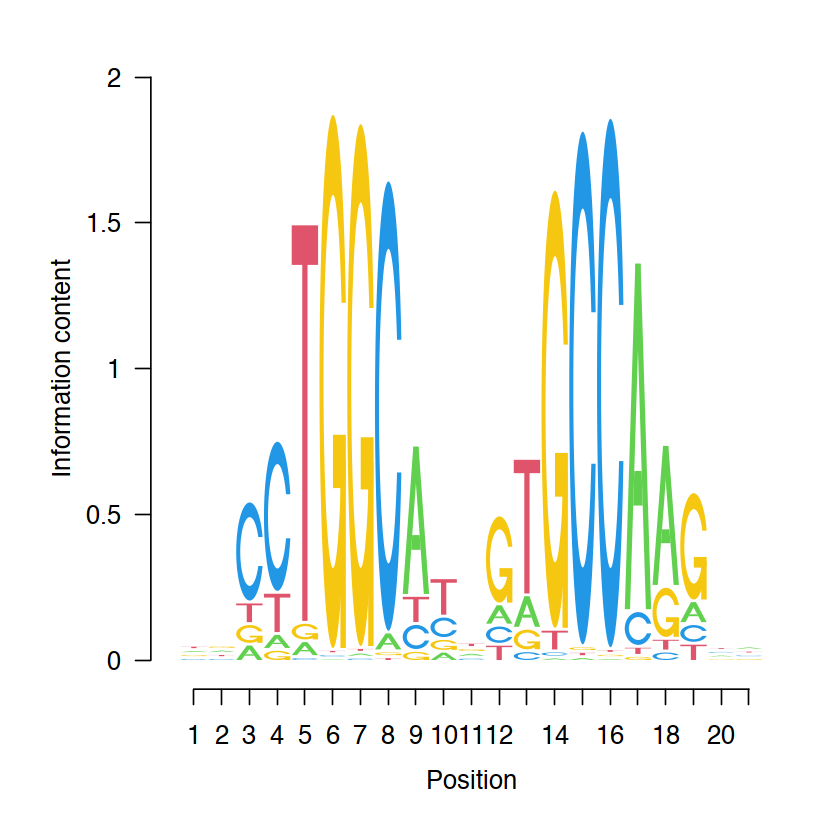

In [13]:
### Nfib
TF.gene = toupper( cluste1_2.DEG.TF$gene[2])
mat = subset (MotifDb, 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM",

[1] 463   5

[1] 27  5

,ENTREZID,gene,hits,TF,source
,<chr>,<chr>,<int>,<chr>,<chr>
1,100088,Rcc1,1,NFIA,hocomocov10
2,100628619,Mir5114,1,NFIA,hocomocov10
3,101471,Phrf1,1,NFIA,hocomocov10
4,101490,Inpp5f,1,NFIA,hocomocov10
5,101565,Ccp110,1,NFIA,hocomocov10
6,102466836,Mir7578,1,NFIA,hocomocov10


[1] 490   5

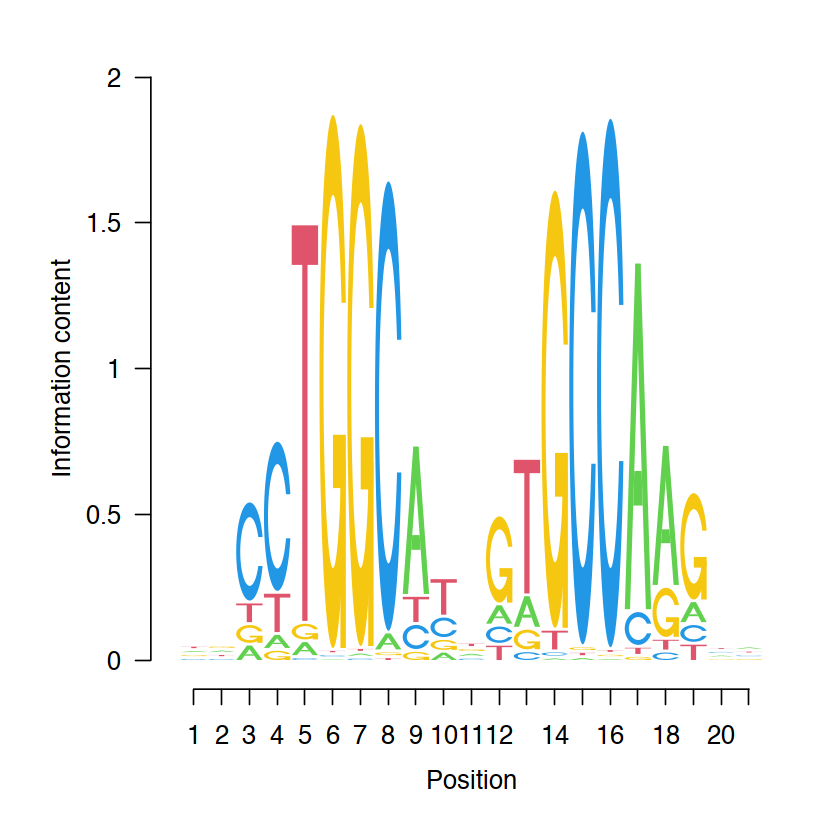

In [14]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
head(TF.hits)
dim(TF.hits)

[1] "NR2F2"
[1] 1
[1] "NR2F2"


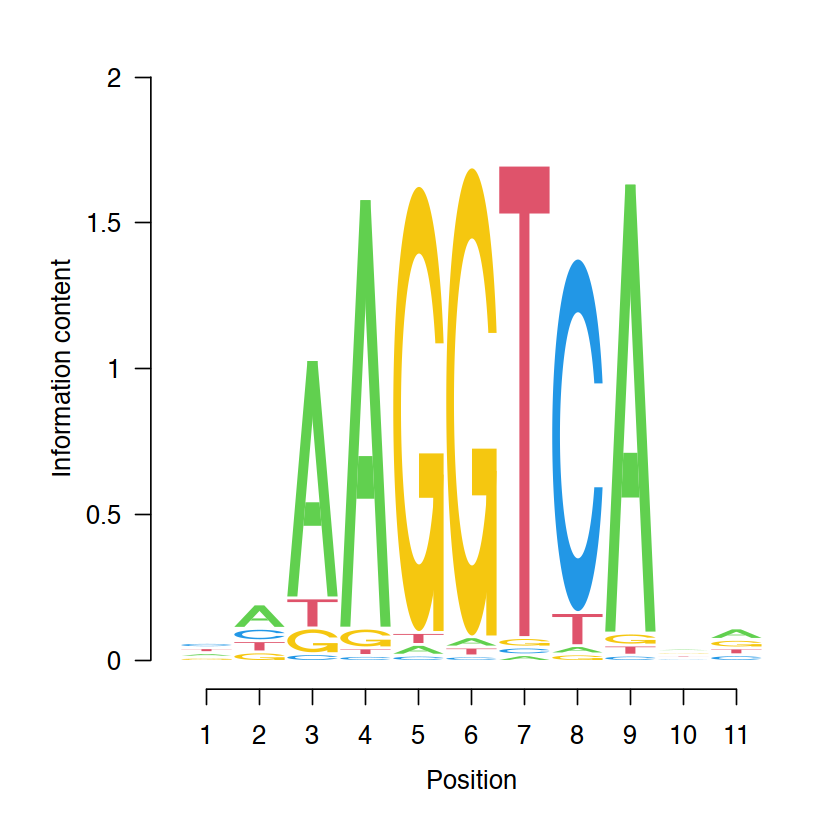

In [15]:
### Nr2f2
TF.gene = toupper( cluste1_2.DEG.TF$gene[3])
mat = subset (MotifDb, 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”
Warning message in .Call2("XString_match_PWM",

[1] 490   5

[1] 2099    5

,ENTREZID,gene,hits,TF,source
,<chr>,<chr>,<int>,<chr>,<chr>
1,100088,Rcc1,1,NFIA,hocomocov10
2,100628619,Mir5114,1,NFIA,hocomocov10
3,101471,Phrf1,1,NFIA,hocomocov10
4,101490,Inpp5f,1,NFIA,hocomocov10
5,101565,Ccp110,1,NFIA,hocomocov10
6,102466836,Mir7578,1,NFIA,hocomocov10


[1] 2589    5

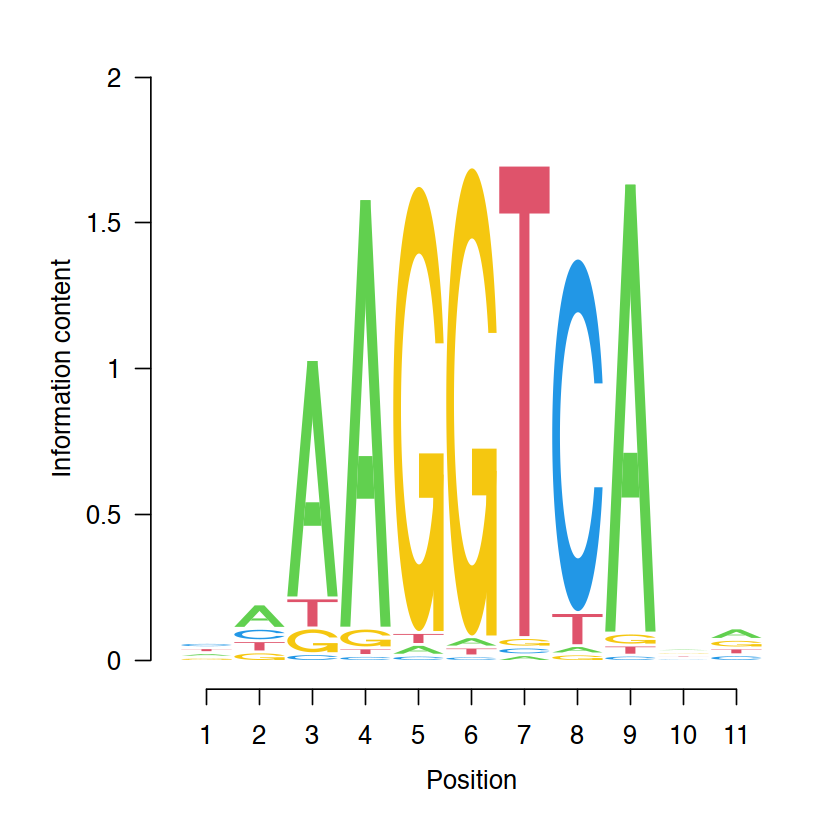

In [16]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
head(TF.hits)
dim(TF.hits)

In [17]:
TF.hits$TF <- str_to_title (TF.hits$TF)
write.csv(TF.hits,"data/ovaryE11-P5-TF.hits-c1-2.csv", row.names = FALSE)
save(TF.hits, file = "data/ovaryE11-P5-TF.hits-c1-2.Rdata")

In [18]:
head(TF.hits)

,ENTREZID,gene,hits,TF,source
,<chr>,<chr>,<int>,<chr>,<chr>
1,100088,Rcc1,1,Nfia,hocomocov10
2,100628619,Mir5114,1,Nfia,hocomocov10
3,101471,Phrf1,1,Nfia,hocomocov10
4,101490,Inpp5f,1,Nfia,hocomocov10
5,101565,Ccp110,1,Nfia,hocomocov10
6,102466836,Mir7578,1,Nfia,hocomocov10


<h1>NFIA and NFIB HITS<h1>

In [19]:
NFIAB.hist <- TF.hits[TF.hits$TF != "Nr2f2","gene"]
length(TF.hits$gene)
length(NFIAB.hist)
head(NFIAB.hist)

[1] 2589

[1] 490

[1] "Rcc1"    "Mir5114" "Phrf1"   "Inpp5f"  "Ccp110"  "Mir7578"

In [20]:
NFIAB.hist <- cluste1_2.DEG[cluste1_2.DEG$gene %in% NFIAB.hist,]
NFIAB.hist.up <- NFIAB.hist[NFIAB.hist$dir == "up",]
NFIAB.hist.down <- NFIAB.hist[NFIAB.hist$dir == "down",]

In [21]:
library(org.Mm.eg.db)
library(AnnotationDbi)
library("clusterProfiler")

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:igraph’:

    simplify


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [22]:
head(NFIAB.hist.up)
head(NFIAB.hist.down)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Nfia,2.842903e-17,0.7486120,0.939,0.761,1.232285e-12,2,up,Nfia
Nfib,1.733598e-09,0.5787188,0.959,0.940,7.514455e-05,2,up,Nfib
Nrep,2.031701e-08,0.4072730,0.949,1.000,8.806613e-04,2,up,Nrep
Igfbp5,1.235739e-07,0.6734732,0.949,0.910,5.356436e-03,2,up,Igfbp5
Ptprs,1.568432e-07,0.2987192,0.939,1.000,6.798527e-03,2,up,Ptprs
Bgn,1.650495e-07,1.0038895,0.582,0.224,7.154236e-03,2,up,Bgn


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Hmga1,4.069092e-17,-1.0699394,0.469,0.955,1.763789e-12,2,down,Hmga1
Trim71,2.275680e-16,-1.0045568,0.194,0.866,9.864161e-12,2,down,Trim71
Kif22,1.101830e-15,-1.1602962,0.194,0.881,4.775994e-11,2,down,Kif22
Slc25a13,2.848440e-14,-1.0533623,0.224,0.806,1.234685e-09,2,down,Slc25a13
Thoc6,5.306877e-14,-0.9970158,0.224,0.791,2.300319e-09,2,down,Thoc6
Rcc1,2.368476e-13,-0.6932797,0.235,0.851,1.026640e-08,2,down,Rcc1


<h1> Enrichment analysis </h1>

In [23]:
#BP MF CC
GO_results <- enrichGO(gene = NFIAB.hist.up$gene, 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")

In [24]:
as.data.frame(GO_results)


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0051216,GO:0051216,cartilage development,3/8,216/28943,2.233042e-05,0.002693196,0.0007691014,Nfib/Bgn/Col3a1,3
GO:0030324,GO:0030324,lung development,3/8,236/28943,2.908414e-05,0.002693196,0.0007691014,Nfib/Igfbp5/Col3a1,3
GO:0030323,GO:0030323,respiratory tube development,3/8,239/28943,3.020050e-05,0.002693196,0.0007691014,Nfib/Igfbp5/Col3a1,3
GO:0060541,GO:0060541,respiratory system development,3/8,267/28943,4.200939e-05,0.002693196,0.0007691014,Nfib/Igfbp5/Col3a1,3
GO:0021537,GO:0021537,telencephalon development,3/8,268/28943,4.247944e-05,0.002693196,0.0007691014,Nfib/Ptprs/Col3a1,3
GO:0018149,GO:0018149,peptide cross-linking,2/8,42/28943,5.724236e-05,0.002743995,0.0007836080,Bgn/Col3a1,2
GO:0061448,GO:0061448,connective tissue development,3/8,302/28943,6.059294e-05,0.002743995,0.0007836080,Nfib/Bgn/Col3a1,3
GO:0031103,GO:0031103,axon regeneration,2/8,53/28943,9.147513e-05,0.003624702,0.0010351133,Nrep/Ptprs,2
GO:0031102,GO:0031102,neuron projection regeneration,2/8,62/28943,1.253732e-04,0.004415924,0.0012610641,Nrep/Ptprs,2


pdf 
  2

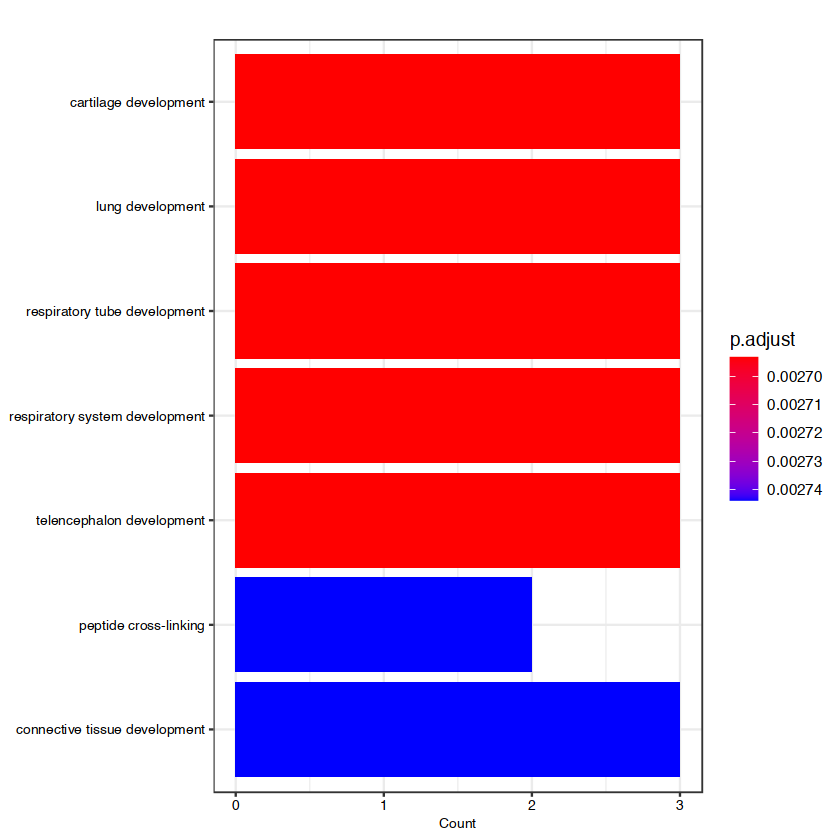

In [25]:
fit <- plot(barplot(GO_results, showCategory = 7, font.size=8))
png("figures/cluster3_DEG_Nfiab_BP.png", res = 600, width = 2400, height = 1800)
print(fit)
dev.off()

<h1>Nr2f2 HITS<h1>

In [26]:
Nr2f2.hits <- TF.hits[TF.hits$TF == "Nr2f2","gene"]
length(TF.hits$gene)
length(Nr2f2.hits)
head(Nr2f2.hits)
length(promoter.seqs)

[1] 2589

[1] 2099

[1] "Mdn1"    "Mfap1b"  "Dnajc3"  "Dynlt1f" "Tceal7"  "Gm14305"

[1] 2410

In [27]:
Nr2f2.hits <- cluste1_2.DEG[cluste1_2.DEG$gene %in% Nr2f2.hits,]
Nr2f2.hits.up <- Nr2f2.hits[Nr2f2.hits$dir == "up",]
Nr2f2.hits.down <- Nr2f2.hits[Nr2f2.hits$dir == "down",]

In [28]:
Nr2f2.hits.up

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Nfia,2.842903e-17,0.7486120,0.939,0.761,1.232285e-12,2,up,Nfia
Col1a1,9.704505e-09,0.7435127,0.888,0.806,4.206515e-04,2,up,Col1a1
Nrep,2.031701e-08,0.4072730,0.949,1.000,8.806613e-04,2,up,Nrep
Anxa2,2.437920e-08,0.5181478,0.929,0.776,1.056741e-03,2,up,Anxa2
Igfbp5,1.235739e-07,0.6734732,0.949,0.910,5.356436e-03,2,up,Igfbp5
Ptprs,1.568432e-07,0.2987192,0.939,1.000,6.798527e-03,2,up,Ptprs
Bgn,1.650495e-07,1.0038895,0.582,0.224,7.154236e-03,2,up,Bgn
Cald1,1.536640e-06,0.4442148,0.939,0.985,6.660721e-02,2,up,Cald1
Nr2f2,2.283100e-06,0.2815345,0.980,1.000,9.896324e-02,2,up,Nr2f2


In [29]:
#BP MF CC
GO_results <- enrichGO(gene = Nr2f2.hits.up$gene, 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")
as.data.frame(GO_results)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0030199,GO:0030199,collagen fibril organization,5/16,60/28943,1.385598e-10,1.068296e-07,4.696448e-08,Col1a1/Anxa2/Col1a2/Tgfb2/Col3a1,5
GO:0030198,GO:0030198,extracellular matrix organization,6/16,322/28943,1.319667e-08,2.639129e-06,1.160215e-06,Col1a1/Anxa2/Col1a2/Tgfb2/Tgfbi/Col3a1,6
GO:0043062,GO:0043062,extracellular structure organization,6/16,323/28943,1.344244e-08,2.639129e-06,1.160215e-06,Col1a1/Anxa2/Col1a2/Tgfb2/Tgfbi/Col3a1,6
GO:0045229,GO:0045229,external encapsulating structure organization,6/16,324/28943,1.369198e-08,2.639129e-06,1.160215e-06,Col1a1/Anxa2/Col1a2/Tgfb2/Tgfbi/Col3a1,6
GO:0043588,GO:0043588,skin development,5/16,323/28943,6.627077e-07,1.021895e-04,4.492461e-05,Col1a1/Igfbp5/Col1a2/Tgfb2/Col3a1,5
GO:0071229,GO:0071229,cellular response to acid chemical,4/16,187/28943,2.890191e-06,3.713895e-04,1.632704e-04,Col1a1/Anxa2/Col1a2/Col3a1,4
GO:0007179,GO:0007179,transforming growth factor beta receptor signaling pathway,4/16,202/28943,3.925052e-06,4.323165e-04,1.900552e-04,Nrep/Col1a2/Tgfb2/Col3a1,4
GO:0001101,GO:0001101,response to acid chemical,4/16,209/28943,4.492111e-06,4.329272e-04,1.903236e-04,Col1a1/Anxa2/Col1a2/Col3a1,4
GO:0051216,GO:0051216,cartilage development,4/16,216/28943,5.117727e-06,4.384186e-04,1.927378e-04,Col1a1/Bgn/Tgfb2/Col3a1,4


pdf 
  2

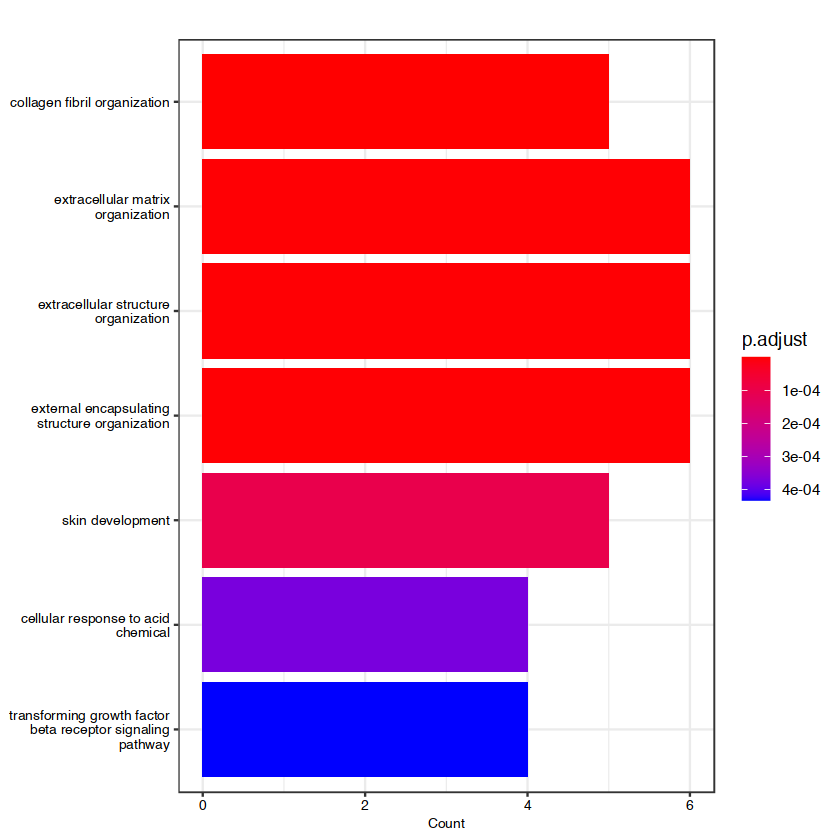

In [30]:
fit <- plot(barplot(GO_results, showCategory = 7, font.size=8))
png("figures/cluster3_DEG_Nfiab_BP.png", res = 600, width = 2400, height = 1800)
print(fit)
dev.off()

<h1>VennDiagram</h1>

In [31]:
library(VennDiagram)
library(tidyverse)

Loading required package: futile.logger

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ purrr     1.0.1
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%--%()      masks igraph::%--%()
✖ lubridate::%within%()  masks IRanges::%within%()
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ dplyr::collapse()      masks Biostrings::collapse(), IRanges::collapse()
✖ dplyr::combine()       masks Biobase::combine(), BiocGenerics::combine()
✖ purrr::compact()       masks XVector::compact()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::desc()          masks IRanges::desc()
✖ tidyr::expand()        masks S4Vectors::expand()
✖ dplyr::filter()        masks clusterProfiler::filter(), stats

In [32]:
# Generate 3 sets of 200 words
set1 <- cluste1_2.DEG$gene
set2 <- NFIAB.hist$gene
 
# Chart
venn.diagram(
  x = list(set1, set2),
  category.names = c("Cluster 1 vs 2" , "Nfia hits"),
  filename = 'figures/cluster1vs2_DEG_Venn.png',
   output = TRUE ,
          imagetype="png" ,
          height = 480 , 
          width = 480 , 
          resolution = 600,
          compression = "lzw",
          lwd = 1,
          col=c("#440154ff", '#21908dff'),
          fill = c(alpha("#440154ff",0.3), alpha('#21908dff',0.3)),
          cex = 0.5,
          fontfamily = "sans",
          cat.cex = 0.3,
          cat.default.pos = "outer",
          cat.pos = c(-27, 27),
          cat.dist = c(0.055, 0.055),
          cat.col = c("#440154ff", '#21908dff')
          
)

[1] 1

<h1>Network</h1>

In [33]:
targetGenes <- TF.hits[,c("gene","hits","TF")]
colnames(targetGenes) <- c("symbol","hits","TFsymbol")
targetGenes$TFsymbol <- str_to_title(targetGenes$TFsymbol)
head(targetGenes)

,symbol,hits,TFsymbol
,<chr>,<int>,<chr>
1,Rcc1,1,Nfia
2,Mir5114,1,Nfia
3,Phrf1,1,Nfia
4,Inpp5f,1,Nfia
5,Ccp110,1,Nfia
6,Mir7578,1,Nfia


In [34]:
head(cluste1_2.DEG.TF)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Nfia,2.842903e-17,0.7486120,0.939,0.761,1.232285e-12,2,up,Nfia
Nfib,1.733598e-09,0.5787188,0.959,0.940,7.514455e-05,2,up,Nfib
Nr2f2,2.283100e-06,0.2815345,0.980,1.000,9.896324e-02,2,up,Nr2f2


In [35]:
TFgenes <- cluste1_2.DEG.TF[ cluste1_2.DEG.TF$dir=="up",c("gene")]
TFgenes <- as.data.frame(TFgenes)
TFgenes$totalBS = "1"
colnames(TFgenes) = c("symbol","totalBS")
TFgenes

symbol,totalBS
<chr>,<chr>
Nfia,1
Nfib,1
Nr2f2,1


In [36]:
create.network.graph <- function(targetGenes,hits,TFgenes,title){
    
    #filter number of hits
    targetGenes <- targetGenes[targetGenes$hits>=hits,]
   
    if(nrow(targetGenes)>0){
        #print(targetGenes)
        rowNames = c(names(table(targetGenes$symbol)),names(table(targetGenes$TFsymbol)))
        rowNames = names(table(rowNames))
        # initialize
        TFBinding <- matrix(0, ncol = length( rowNames), nrow = length( rowNames))
        dim(TFBinding)
        row.names(TFBinding) = rowNames
        colnames(TFBinding) = rowNames

        #Rows transcription factors Columns Target genes
        for(i in 1:nrow(targetGenes)){
            TFBinding[targetGenes[i,]$TFsymbol, targetGenes[i,]$symbol ] <- targetGenes[i,]$hits

        }
        
        
        g <- graph.adjacency(
          TFBinding,
          mode="directed",
          weighted=TRUE,
          diag=FALSE
        )
        # Simplfy the adjacency object
        #g <- simplify(g, remove.multiple=TRUE, remove.loops=TRUE)

        # Colour negative correlation edges as blue
        E(g)[which(E(g)$weight<0)]$color <- "darkblue"

        # Colour positive correlation edges as red
        E(g)[which(E(g)$weight>0)]$color <- "darkred"

        # Convert edge weights to absolute values
        #E(g)$weight <- abs(E(g)$weight)

        # Change arrow size
        # For directed graphs only
        E(g)$arrow.size <- 0.3

        # Remove edges below absolute Pearson correlation 0.8
        #g <- delete_edges(g, E(g)[which(E(g)$weight<0.8)])

        # Remove any vertices remaining that have no edges
        g <- delete.vertices(g, degree(g)==0)

        # Assign names to the graph vertices (optional)
        V(g)$name <- V(g)$name

        # Change shape of graph vertices
        V(g)$shape <- "sphere"

        # Change colour of graph vertices
        g_data <-  get.data.frame(g,  what="vertices")$name
        #print(g_data)
        V(g)$color <- ifelse(g_data %in% TFgenes$symbol,"blue","blue") 
        # Change colour of vertex frames
        V(g)$vertex.frame.color <- "white"

        # Scale the size of the vertices to be proportional to the level of expression of each gene represented by each vertex
        # Multiply scaled vales by a factor of 10
        #scale01 <- function(x){(x-min(x))/(max(x)-min(x))}
        #vSizes <- (scale01(apply(TFBinding, 1, mean)) + 1.0) * 10

        # Amplify or decrease the width of the edges
        edgeweights <- E(g)$weight * 2.0

        # Convert the graph adjacency object into a minimum spanning tree based on Prim's algorithm
        #mst <- mst(g, algorithm="prim")

        # Plot the tree object
        plot(
          g,
          layout=layout.fruchterman.reingold,
          edge.curved=FALSE,
          vertex.size=35,
          #vertex.label.dist=-0.5,
          vertex.label.color="white",
          asp=FALSE,
          #vertex.label.cex=1,
          edge.arrow.mode = E(g)$arrow,
          main=title)
   } 
}

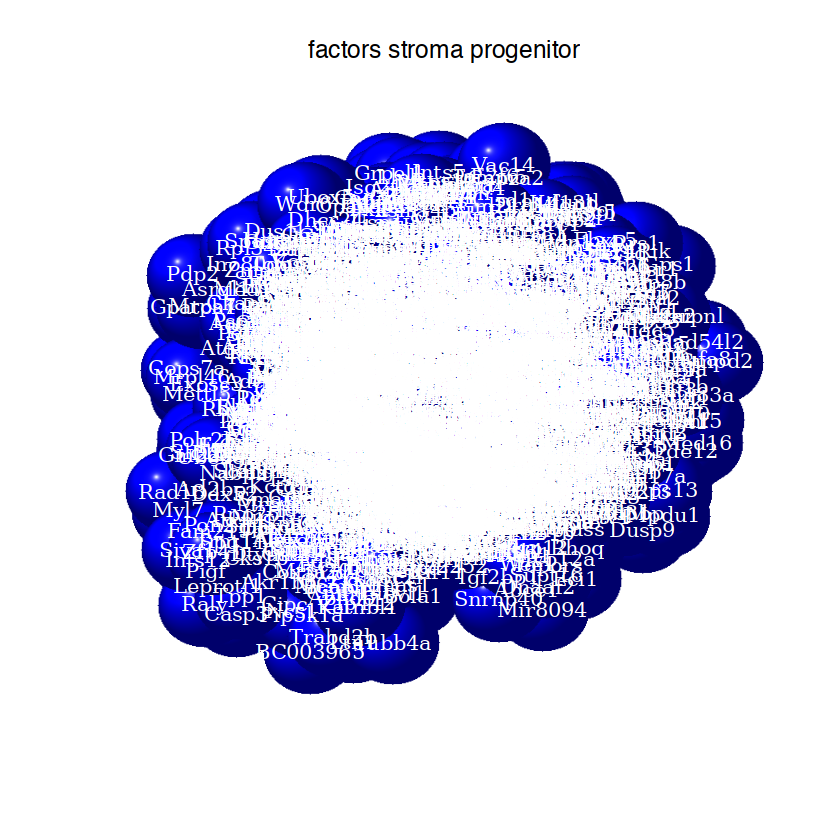

In [37]:

#TFgenes = TFgenes[TFgenes$symbol %in% c("Tcf21","Nfix"),]
#targetGenes = targetGenes[targetGenes$symbol %in% TFgenes$symbol ,]
create.network.graph(targetGenes,hits=1,TFgenes,
                     title = paste("factors stroma progenitor"))

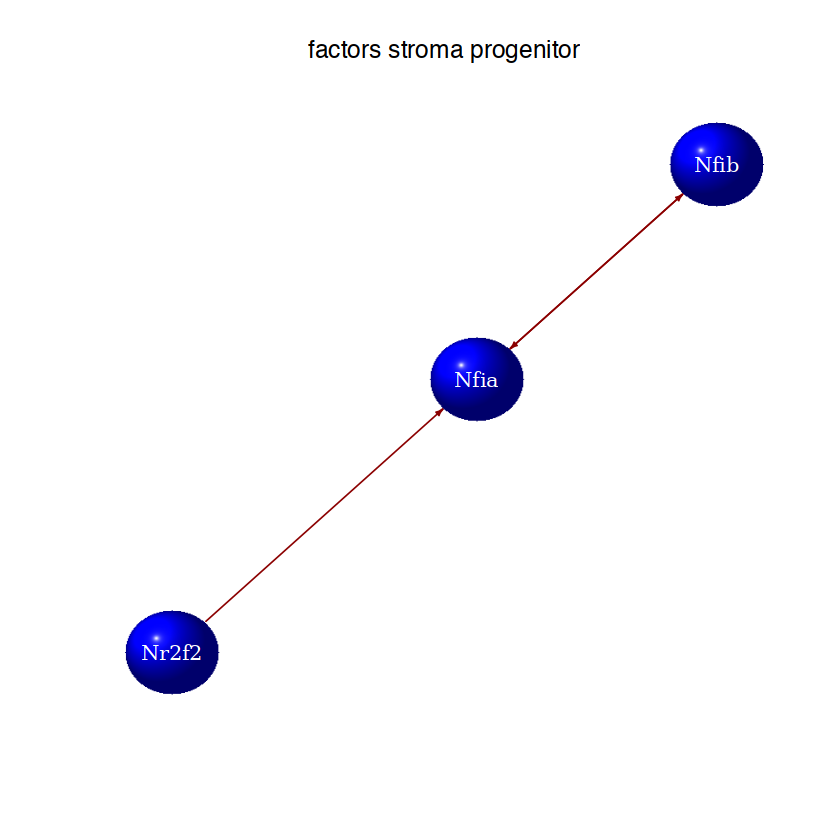

In [38]:
#Tcf21 and NFIX
#TFgenes = TFgenes[TFgenes$symbol %in% c("Tcf21","Nfix"),]
targetGenes2 = targetGenes[targetGenes$symbol %in% TFgenes$symbol ,]
create.network.graph(targetGenes2,hits=1,TFgenes,
                     title = paste("factors stroma progenitor"))